<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/day2_lab_question_sessions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 2: 자율주행을 위한 데이터 처리 실습

**과정 목표:**
1. Lidar와 Radar 센서 데이터의 근본적인 차이점을 시각적으로 이해합니다.
2. Python 표준 라이브러리와 NumPy, Matplotlib만을 사용하여 기본적인 센서 데이터 처리 기법을 익힙니다.
3. 실제 Carla 시뮬레이터에서 사용하는 데이터 형식(`Carla-like` format)을 다루며, 오프라인 개발 워크플로우를 체험합니다.

---

## 실습 1: Lidar와 Radar 데이터 시각화

**목표:** Lidar의 포인트 클라우드와 Radar의 탐지 객체 목록을 2D 평면에 함께 시각화하여 두 센서가 세상을 어떻게 다르게 인지하는지 직관적으로 이해합니다. 이번 실습에서는 도로 위에 원통형 장애물이 있는 간단한 장면을 사용합니다.

In [ ]:
# 실습에 필요한 라이브러리를 불러옵니다.
import numpy as np
import matplotlib.pyplot as plt
import io

### 데이터 준비

실제 실습 환경에서는 파일을 업로드해야 하지만, 이 노트북에서는 편의를 위해 데이터가 직접 포함되어 있습니다. 아래 코드를 실행하여 데이터를 `numpy` 배열로 불러오세요. 데이터 파일의 이름은 `scene_lidar_data.csv`와 `scene_radar_data.csv`입니다.

In [ ]:
# Lidar 데이터 (x, y, z, intensity)
# Ground plane + Cylinder obstacle
lidar_csv_data = """-4.8328,15.6338,-1.5111,0.3012
2.0195,36.4988,-1.5019,0.2289
20.0226,1.4996,-0.5000,0.9000
2.8361,45.8679,-1.4883,0.2917
21.4981,0.0000,0.5000,0.9000
-1.9213,28.2974,-1.5032,0.3164
20.0000,1.5000,1.5000,0.9000
7.1947,21.5238,-1.5011,0.2887
20.0226,-1.4996,-0.5000,0.9000
-8.4331,6.9383,-1.4912,0.3814
21.4981,0.0000,-0.5000,0.9000
2.4782,19.9128,-1.4978,0.3342
20.0000,-1.5000,0.5000,0.9000
20.0000,1.5000,-0.5000,0.9000
21.2941,0.7500,1.5000,0.9000
21.2941,-0.7500,-0.5000,0.9000
20.0000,-1.5000,1.5000,0.9000
21.2941,0.7500,-0.5000,0.9000
21.2941,-0.7500,0.5000,0.9000
-5.2281,40.1181,-1.5321,0.3412
0.1123,33.1823,-1.4812,0.2141
8.1241,11.4124,-1.5124,0.3124
20.5878,-1.2990,0.5000,0.9000
20.5878,1.2990,1.5000,0.9000
20.5878,-1.2990,-0.5000,0.9000
20.5878,1.2990,-0.5000,0.9000
20.5878,1.2990,0.5000,0.9000
20.0000,-1.5000,-0.5000,0.9000
21.4981,0.0000,1.5000,0.9000
21.2941,-0.7500,1.5000,0.9000
20.0226,1.4996,1.5000,0.9000
20.0226,-1.4996,0.5000,0.9000
20.0226,1.4996,0.5000,0.9000
20.0226,-1.4996,1.5000,0.9000
2.1331,12.1341,-1.5123,0.3123
1.4124,10.1245,-1.5124,0.2412
-4.1234,8.1234,-1.5312,0.3124
20.0000,1.5000,0.5000,0.9000
21.4981,0.0000,0.5000,0.9000
20.5878,-1.2990,1.5000,0.9000
21.2941,0.7500,0.5000,0.9000
"""

# Radar 데이터 (velocity, azimuth, altitude, depth)
radar_csv_data = """0.0000,0.0000,0.0000,20.0000
-5.0000,0.5000,0.1000,40.0000
10.0000,-0.2000,-0.1000,60.0000"""

lidar_data = np.loadtxt(io.StringIO(lidar_csv_data), delimiter=',')
radar_data = np.loadtxt(io.StringIO(radar_csv_data), delimiter=',')

print(f"Lidar 데이터 로드 완료: {lidar_data.shape}")
print(f"Radar 데이터 로드 완료: {radar_data.shape}")

Lidar 데이터 로드 완료: (41, 4)
Radar 데이터 로드 완료: (3, 4)


### 작업 1: Lidar 및 Radar 데이터 시각화

아래 코드 셀의 `# TODO` 부분을 채워 Lidar와 Radar 데이터를 하나의 2D 그래프에 시각화하세요.

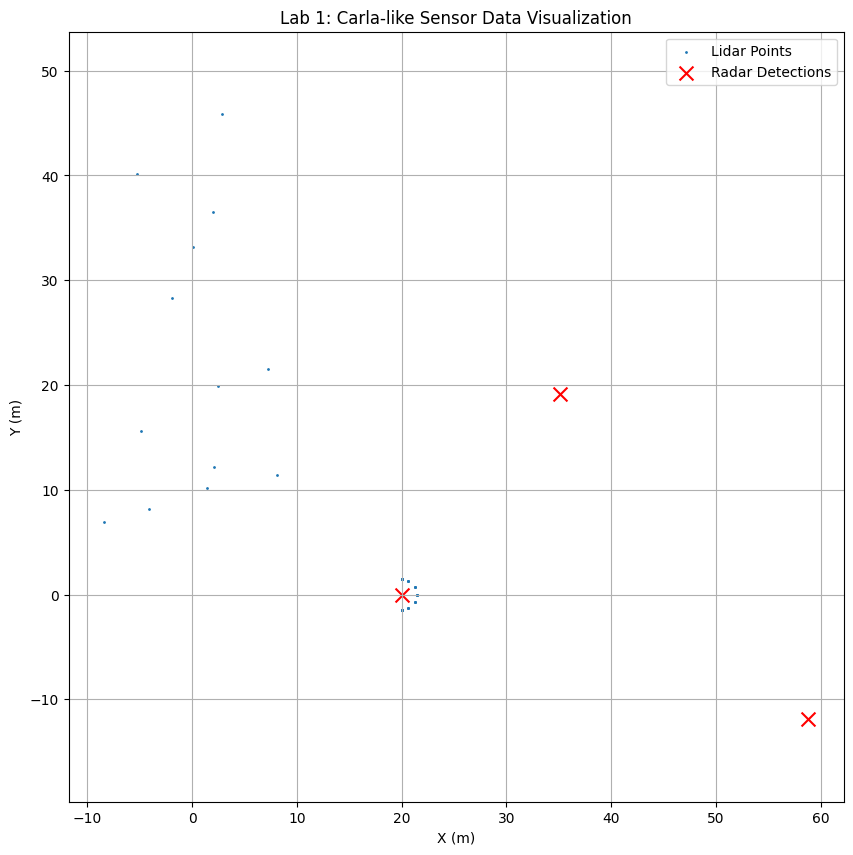

In [ ]:
# 그래프를 준비합니다.
plt.figure(figsize=(10, 10))

# --- Lidar 시각화 ---
# TODO: lidar_data의 x(0번 열), y(1번 열) 좌표를 사용하여 산점도를 그리세요.
# s=1, label='Lidar Points' 옵션을 사용하세요.
plt.scatter(lidar_data[:, 0], lidar_data[:, 1], s=1, label='Lidar Points')


# --- Radar 시각화 ---
# Radar 데이터는 [velocity, azimuth, altitude, depth] 형식입니다.
# TODO: radar_data의 depth(3번 열)와 azimuth(1번 열)를 x, y 좌표로 변환하세요.
radar_x = radar_data[:, 3] * np.cos(radar_data[:, 1])
radar_y = radar_data[:, 3] * np.sin(radar_data[:, 1])


# TODO: 변환된 radar_x, radar_y를 붉은색 'x' 마커로 그리세요.
# s=100, c='red', marker='x', label='Radar Detections' 옵션을 사용하세요.
plt.scatter(radar_x, radar_y, s=100, c='red', marker='x', label='Radar Detections')


# --- 그래프 설정 ---
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Lab 1: Carla-like Sensor Data Visualization')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

---

## 실습 2: Lidar 데이터 필터링 및 관심 영역(ROI) 설정

**목표:** Lidar 포인트 클라우드에서 불필요한 데이터(지면)를 제거하고, 분석에 필요한 핵심 영역(ROI)의 데이터만 추출합니다. 이를 통해 데이터 전처리의 중요성을 이해합니다.

### 작업 2: Lidar 데이터 필터링

아래 코드 셀의 `# TODO` 부분을 채워 Lidar 데이터에 두 가지 필터링 규칙을 적용하세요.
1.  **지면 제거:** Z 좌표가 -1.0m보다 높은 포인트들만 남깁니다.
2.  **ROI 설정:** 차량 전방 18m ~ 22m, 좌우 2m 영역 내의 포인트만 남깁니다.

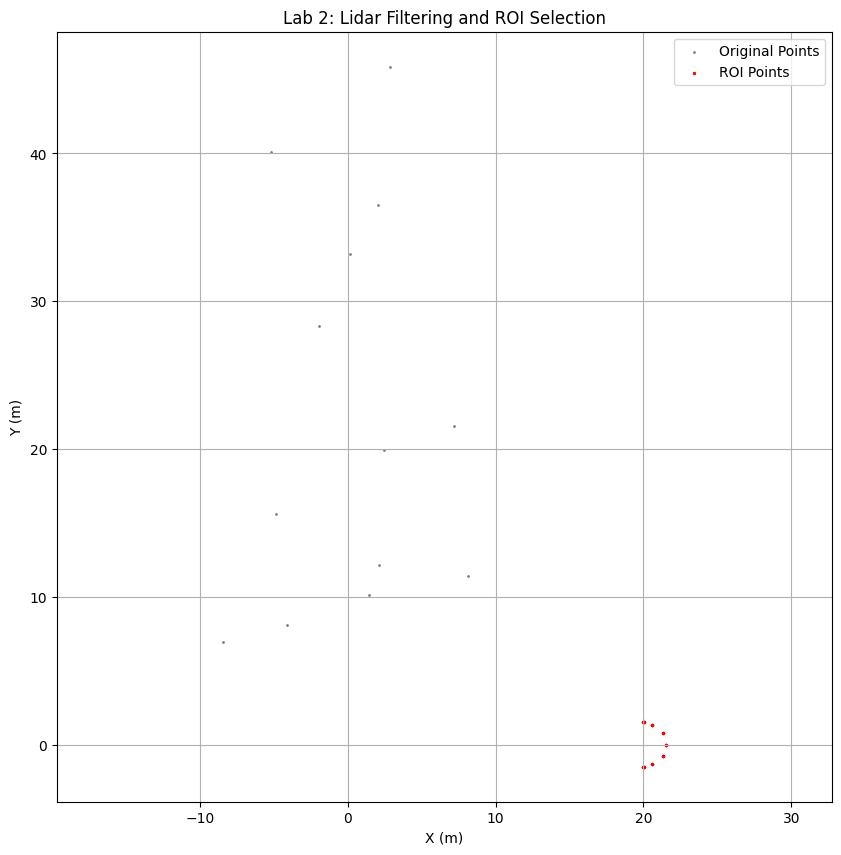

Original points: 41
After ground removal: 28
After ROI filter: 28


In [ ]:
# 그래프를 준비합니다.
plt.figure(figsize=(10, 10))

# 원본 데이터를 회색으로 먼저 그립니다.
plt.scatter(lidar_data[:, 0], lidar_data[:, 1], s=1, c='gray', label='Original Points')

# --- 1. 지면 제거 ---
# TODO: lidar_data에서 Z좌표(2번 열)가 -1.0보다 큰 포인트만 선택하여 points_no_ground 변수에 저장하세요.
points_no_ground = lidar_data[lidar_data[:, 2] > -1.0]

# --- 2. ROI 필터링 ---
# 조건: 18m < X < 22m  그리고  -2m < Y < 2m
# TODO: points_no_ground에서 위 ROI 조건을 만족하는 포인트만 선택하여 roi_points 변수에 저장하세요.
# 힌트: 여러 조건을 & 연산자로 결합하세요.
roi_points = points_no_ground[
(points_no_ground[:, 0] > 18) & (points_no_ground[:, 0] < 22) &
(points_no_ground[:, 1] > -2) & (points_no_ground[:, 1] < 2)
]

# --- 결과 시각화 ---
# TODO: 최종 필터링된 roi_points를 붉은색으로 그리세요.
# s=2, c='red', label='ROI Points' 옵션을 사용하세요.
plt.scatter(roi_points[:, 0], roi_points[:, 1], s=2, c='red', label='ROI Points')

# --- 그래프 설정 ---
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Lab 2: Lidar Filtering and ROI Selection')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# 필터링 결과 출력
print(f"Original points: {len(lidar_data)}")
print(f"After ground removal: {len(points_no_ground)}")
print(f"After ROI filter: {len(roi_points)}")

---

## 실습 3: 미니 인지 파이프라인 구현

**목표:** 필터링된 데이터를 바탕으로 간단한 의사결정 로직을 추가하여, '데이터 입력 → 처리 → 판단'으로 이어지는 최소 단위의 인지 파이프라인을 완성합니다.

### 작업 3: 위험 감지 로직 추가

차량 바로 앞의 '위험 영역(Danger Zone)'을 설정하고, 이 영역 내에 특정 개수 이상의 포인트가 감지되면 위험 경고를 출력하는 로직을 구현합니다.

Clear: Path is safe.
Points in danger zone: 0


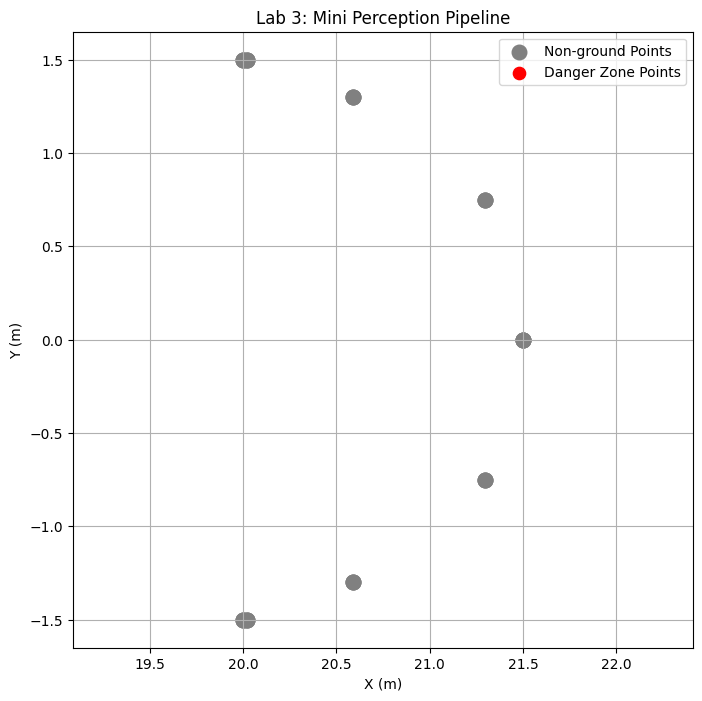

In [ ]:
# Lab 2의 지면 제거 코드를 그대로 사용합니다.
points_no_ground = lidar_data[lidar_data[:, 2] > -1.0]

# --- 1. 위험 영역(Danger Zone) 설정 ---
# 조건: 0m < X < 5m  그리고  -2m < Y < 2m (차량 바로 앞)
# TODO: points_no_ground에서 위 Danger Zone 조건을 만족하는 포인트만 선택하여 danger_zone_points 변수에 저장하세요.
danger_zone_points = points_no_ground[
(points_no_ground[:, 0] > 0) & (points_no_ground[:, 0] < 5) &
(points_no_ground[:, 1] > -2) & (points_no_ground[:, 1] < 2)
]


# --- 2. 의사결정 로직 ---
point_count_threshold = 5 # 위험으로 판단할 포인트 개수 임계값

# TODO: danger_zone_points의 개수가 point_count_threshold보다 많으면
# "DANGER: Obstacle Detected!"를 출력하고, 그렇지 않으면 "Clear: Path is safe."를 출력하세요.
# 힌트: len() 함수를 사용하세요.
if len(danger_zone_points) > point_count_threshold:
  print("DANGER: Obstacle Detected!")
else:
  print("Clear: Path is safe.")

# --- 결과 확인 ---
print(f"Points in danger zone: {len(danger_zone_points)}")

# 시각화 (옵션)
plt.figure(figsize=(8, 8))
plt.scatter(points_no_ground[:, 0], points_no_ground[:, 1], s=110, c='gray', label='Non-ground Points')
plt.scatter(danger_zone_points[:, 0], danger_zone_points[:, 1], s=78, c='red', label='Danger Zone Points')
plt.xlabel('X (m)'); plt.ylabel('Y (m)')
plt.title('Lab 3: Mini Perception Pipeline')
plt.legend(); plt.grid(True); plt.axis('equal'); plt.show()

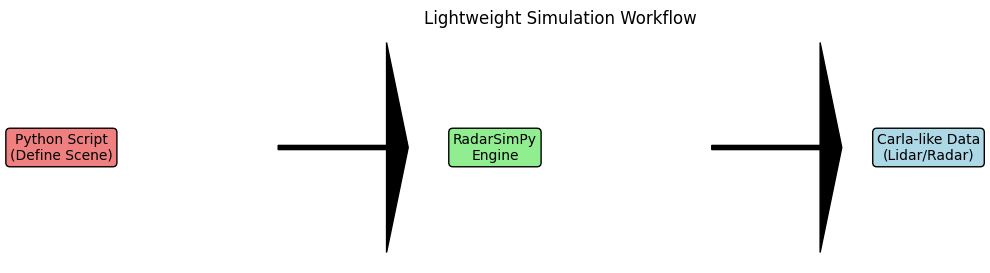

In [ ]:
import matplotlib.pyplot as plt
import os

# Create the directory if it doesn't exist
os.makedirs('visuals', exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 3))
ax.text(0.1, 0.5, 'Python Script\n(Define Scene)', ha='center', va='center', bbox=dict(boxstyle="round", fc="lightcoral"))
ax.arrow(0.3, 0.5, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')
ax.text(0.5, 0.5, 'RadarSimPy\nEngine', ha='center', va='center', bbox=dict(boxstyle="round", fc="lightgreen"))
ax.arrow(0.7, 0.5, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')
ax.text(0.9, 0.5, 'Carla-like Data\n(Lidar/Radar)', ha='center', va='center', bbox=dict(boxstyle="round", fc="lightblue"))
ax.set_xticks([]); ax.set_yticks([]); ax.axis('off')
ax.set_title('Lightweight Simulation Workflow')
plt.savefig('visuals/future_work_1.png')